In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data=load_iris()
print(data.keys())
print(data["target_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


In [3]:
x=data["data"]
y=data["target"]

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [5]:
k_range=range(5,15)
scores=[]

for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    # accuracy=accuracy_score(y_test,ypred)
    # scores.append(accuracy)
    score=cross_val_score(model,x,y,cv=10,scoring="accuracy")
    scores.append(score.mean())
print(scores)

[0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334]


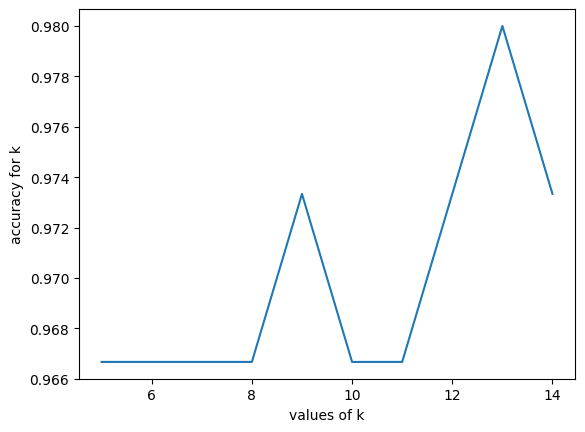

In [6]:
plt.plot(k_range,scores)
plt.xlabel("values of k")
plt.ylabel("accuracy for k")
plt.show()

In [7]:
# from above graph 13 is optimal value for k 13%3!=0

optimal_model=KNeighborsClassifier(n_neighbors=13)
# optimal_model.fit(x_train,y_train)
optimal_model.fit(x,y)
y_pred=optimal_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

100.0


In [8]:
data1=(5.2,3,2.4, 0.3)
data1=np.asarray(data1)
data1=data1.reshape(1,-1)
pred=optimal_model.predict(data1)

In [9]:
if pred==0:
    print("'setosa'") 
elif pred==1:
    print("'versicolor'")
else:
    print("'virginica'")

'setosa'
